In [1]:
# 모듈 불러오기

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from glob import glob    # glob는 파일들의 리스트를 뽑을 때 사용
from PIL import Image   # Python Imaging Library(PIL)라는 파이썬 이미지 처리 라이브러리의 지원이 2011년 중단되고, Pillow가 PIL의 후속 프로젝트로 나왔습니다. 즉, Pillow가 공식 PIL이라고 보면 되겠네요. 실제로 import 할 때에도 PIL이라는 이름을 사용
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # 이미지 증식을 위해서 사용

In [4]:
# root dir 설정. 폴더명은 압축해제한 경로에 따라 달라질 수 있음

root_dir = "D:/작업방/Python/data/NEU Metal Surface Defects Data"

# os.listdir() 코드로 train 하위 폴더 탐색

os.listdir(root_dir + "/train")

# os.listdir() 코드로 train 하위 폴더 속 파일 탐색

os.listdir(root_dir + "/train/Inclusion")

['In_120.bmp',
 'In_121.bmp',
 'In_122.bmp',
 'In_123.bmp',
 'In_124.bmp',
 'In_125.bmp',
 'In_126.bmp',
 'In_127.bmp',
 'In_128.bmp',
 'In_129.bmp',
 'In_13.bmp',
 'In_130.bmp',
 'In_131.bmp',
 'In_132.bmp',
 'In_133.bmp',
 'In_134.bmp',
 'In_135.bmp',
 'In_136.bmp',
 'In_137.bmp',
 'In_138.bmp',
 'In_139.bmp',
 'In_14.bmp',
 'In_140.bmp',
 'In_141.bmp',
 'In_142.bmp',
 'In_143.bmp',
 'In_144.bmp',
 'In_145.bmp',
 'In_146.bmp',
 'In_147.bmp',
 'In_148.bmp',
 'In_149.bmp',
 'In_15.bmp',
 'In_150.bmp',
 'In_151.bmp',
 'In_152.bmp',
 'In_153.bmp',
 'In_154.bmp',
 'In_155.bmp',
 'In_156.bmp',
 'In_157.bmp',
 'In_158.bmp',
 'In_159.bmp',
 'In_16.bmp',
 'In_160.bmp',
 'In_161.bmp',
 'In_162.bmp',
 'In_163.bmp',
 'In_164.bmp',
 'In_165.bmp',
 'In_166.bmp',
 'In_167.bmp',
 'In_168.bmp',
 'In_169.bmp',
 'In_17.bmp',
 'In_170.bmp',
 'In_171.bmp',
 'In_172.bmp',
 'In_173.bmp',
 'In_174.bmp',
 'In_175.bmp',
 'In_176.bmp',
 'In_177.bmp',
 'In_178.bmp',
 'In_179.bmp',
 'In_18.bmp',
 'In_180.bmp',
 

In [5]:
# 폴더명 지정하여 변수로 저장 

train_dir = root_dir + "/train"
val_dir = root_dir + "/valid"
test_dir = root_dir + "/test"

In [6]:
# 라벨명을 리스트로 미리 만들어 놓기

labels = os.listdir(train_dir)
labels

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [7]:
# train 하위 폴더별 이미지 개수 파악

for label in labels:
    print("{} : {}개".format(label, len(os.listdir(train_dir+"/"+label))))

Crazing : 276개
Inclusion : 276개
Patches : 276개
Pitted : 276개
Rolled : 276개
Scratches : 276개


D:/작업방/Python/data/NEU Metal Surface Defects Data/train/Crazing/Cr_120.bmp
Cr_120.bmp


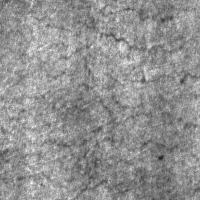

In [14]:
# 이미지 하나 불러와서 출력하기

img_file_list = os.listdir(train_dir+"/"+labels[0]+"/") # crazing 파일 리스트 
img_file = train_dir+"/"+labels[0]+"/"+img_file_list[0] # 1번째 사진
image_pil = Image.open(img_file)
print(image_pil.filename)
print(image_pil.filename.split('/')[-1])
image_pil

In [15]:
# 이미지를  numpy ndarray로 변환하여 이미지 출력

image = np.array(image_pil)
print(image.shape)
image

(200, 200)


array([[141, 131, 126, ..., 149, 158, 172],
       [106, 125, 114, ..., 149, 158, 194],
       [118, 113,  82, ..., 163, 159, 175],
       ...,
       [167, 176, 145, ..., 146, 139, 125],
       [131, 146, 152, ..., 139, 140, 139],
       [122, 139, 140, ..., 148, 150, 122]], dtype=uint8)

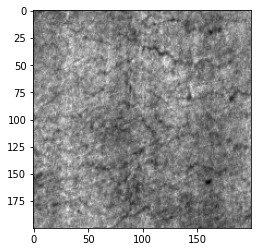

In [16]:
plt.imshow(image, "gray")
plt.show()

Cr_120.bmp


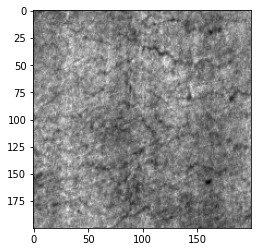

In_120.bmp


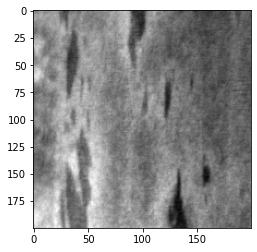

Pa_120.bmp


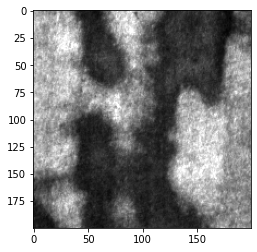

PS_120.bmp


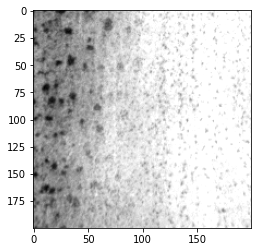

RS_120.bmp


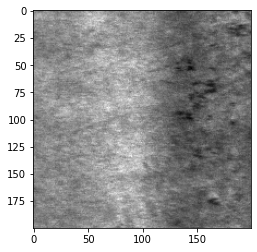

Sc_120.bmp


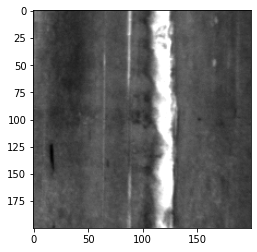

In [17]:
# Defects 클래스별 첫번째 이미지 확인

for label in labels:
    img_file_list = os.listdir(train_dir+"/"+label+"/")
    img_file = train_dir+"/"+label+"/"+img_file_list[0]
    image_pil = Image.open(img_file)
    image = np.array(image_pil)
    print(image_pil.filename.split('/')[-1]) 
    plt.imshow(image, "gray")
    plt.show()

In [24]:
os.listdir(train_dir) # image_dir

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [40]:
# 이미지를 ndarray 묶음으로 변환

# 입력 데이터를 ndarray로 변환하는 사용자 함수 선언

def makeTrainData(image_dir):
    x_list = None
    y_list = None
    cnt = 0
    
    for label_no, label_dir in enumerate(os.listdir(image_dir)):
        for file in os.listdir(image_dir + "/" + label_dir):
            cnt += 1
            print("처리중...({})".format(cnt), end="\r") # im 다른 모드 변환 이미지반환(RGB, CMYK, L(256단계 흑백 이미지), 1(단색 이미지)
            this_img = np.array(Image.open(image_dir + "/" + label_dir + "/" + file).convert("RGB"))
            this_img = np.expand_dims(this_img, axis=0) # 1번째 축에 차원 추가
            if x_list is None:
                x_list = this_img
            else:
                x_list = np.vstack([x_list, this_img])
                
            this_label = np.zeros(shape=(1,6))
            this_label[0, label_no] = 1
            if y_list is None:
                y_list = this_label
            else:
                y_list = np.vstack([y_list, this_label])
    
    x_list =x_list / 255.  # 데이터 정규화
    return x_list, y_list   

In [41]:
# [참조]

for label_no, label_dir in enumerate(os.listdir(train_dir)):
    print(label_no, label_dir)

0 Crazing
1 Inclusion
2 Patches
3 Pitted
4 Rolled
5 Scratches


array([[1., 0., 0., 0., 0., 0.]])

In [42]:
# 학습용(train) 데이터셋 생성

x_train, y_train = makeTrainData(train_dir)   
x_train.shape, y_train.shape     # 276 * 6라벨

((1656, 200, 200, 3), (1656, 6))

In [44]:
# 검증용(validation) 데이터셋 생성

x_val, y_val = makeTrainData(val_dir)
x_val.shape, y_val.shape   # 12 * 6

((72, 200, 200, 3), (72, 6))

In [45]:
# 모델 생성

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape = (200, 200, 3), kernel_size=(3,3),
                          filters=32, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=6, activation="softmax")
])

# 네트워크 구조 확인

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [46]:
#  모델 컴파일, 
# "categorical_crossentropy"는 데이터의 라벨이 원-핫 인코딩 된 형태의 경우 사용,
# "sparse_categorical_crossentropy"는 데이터의 라벨이 Int형 일 때 사용한다.

model.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", 
             metrics=["accuracy"])

In [47]:
# 모델 학습 (개인노트북에서 50분 소요)

history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/25
52/52 [==============================] - 132s 2s/step - loss: 1.7594 - accuracy: 0.2899 - val_loss: 1.1112 - val_accuracy: 0.4028
Epoch 2/25
52/52 [==============================] - 110s 2s/step - loss: 0.9999 - accuracy: 0.5978 - val_loss: 0.5023 - val_accuracy: 0.8611
Epoch 3/25
52/52 [==============================] - 114s 2s/step - loss: 0.6266 - accuracy: 0.7736 - val_loss: 0.4296 - val_accuracy: 0.8889
Epoch 4/25
52/52 [==============================] - 114s 2s/step - loss: 0.4962 - accuracy: 0.8225 - val_loss: 0.2020 - val_accuracy: 0.9583
Epoch 5/25
52/52 [==============================] - 116s 2s/step - loss: 0.3283 - accuracy: 0.8871 - val_loss: 0.1298 - val_accuracy: 0.9444
Epoch 6/25
52/52 [==============================] - 119s 2s/step - loss: 0.3886 - accuracy: 0.8780 - val_loss: 1.4957 - val_accuracy: 0.4722
Epoch 7/25
52/52 [==============================] - 127s 2s/step - loss: 0.6117 - accuracy: 0.7826 - val_loss: 0.1979 - val_accuracy: 0.9583
Epoch 8/25
52

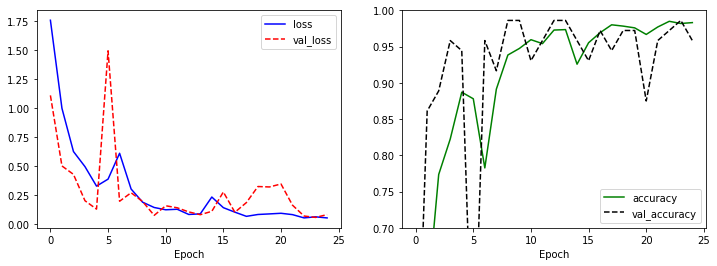

In [48]:
# 모델 학습 (트레이닝) 결과 확인
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "g-", label="accuracy")
plt.plot(history.history["val_accuracy"], "k--", label="val_accuracy")
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [53]:
# 케라스 모델로 저장
save_path = "my_model.h5"
model.save(save_path, include_optimizer=True)

In [54]:
# 모델 불러오기

model = tf.keras.models.load_model("my_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [57]:
# test 이미지 1개 확인
# 라벨 확인

labels = os.listdir(test_dir)
labels

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [62]:
img_file_list = os.listdir(test_dir+"/"+labels[0]+"/")
img_file_list

['Cr_1.bmp',
 'Cr_10.bmp',
 'Cr_100.bmp',
 'Cr_101.bmp',
 'Cr_102.bmp',
 'Cr_103.bmp',
 'Cr_104.bmp',
 'Cr_105.bmp',
 'Cr_106.bmp',
 'Cr_107.bmp',
 'Cr_108.bmp',
 'Cr_109.bmp']

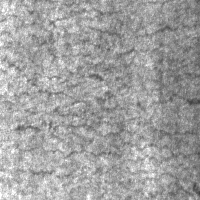

In [63]:
# Crazing 1th image 

img_file = test_dir+"/"+labels[0]+"/"+img_file_list[0]
image_pil = Image.open(img_file).convert("RGB") #컬러 이미지로 불러오기
image_pil

1/1 [==============================] - 0s 86ms/step
[[9.9999964e-01 6.7108442e-14 1.1858899e-08 3.4501201e-07 1.4180430e-10
  9.7923514e-13]]
0
100.0


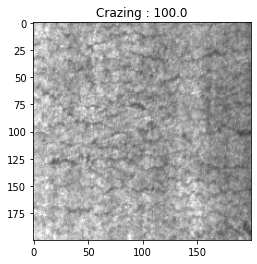

In [83]:
img = np.array(image_pil)   # array로 변환
img = img / 255.            #0~1 사이로 리스케일링
img = img[tf.newaxis, ...]  #앞쪽에 배열 추가,  1,200,200,3 
img

pred = model.predict(img)   #모델을 활용하여 img 예측, pred는 6개 클래스에 대한 확률값
print(pred)

classes = np.argmax(pred)  # 가장 확률이 높은 인덱스(라벨) 확인해 classes 변수에 저장
print(classes)

confidence = round(np.max(pred) * 100, 2) # 확률값 100% 기준으로 계산
print(confidence)

names = labels[classes]  # 예측한 라벨을 names에 저장
title = "{} : {}".format(names, confidence)
plt.title(title)
# plt.imshow(img, "gray")   # 에러 => imshow 입력데이터는 (행,열,차원(컬러/흑백)) 구조를 가지므로 (1,200,200,3)  중 1을 제외해야 함
plt.imshow(np.squeeze(img), "gray")  #200,200 이미지 출력,,, np.squeeze()함수는 크기가 1인 axis 제거하여 (200,200,3) 으로 변경
plt.show()


In [84]:
# 평가 (test) 이미지 파일을 뽑아 리스트 변수에 추가 
# 각 label  당 4개 추출 : 4*6 = 24

test_file_list = []
for dir in os.listdir(test_dir):  #test 폴더 하위에 있는 6개 폴더를 반복문으로 접근
    for idx, file in enumerate(os.listdir(test_dir + "/" + dir)):  #6개 폴더별 파일들에 반복문으로 접근
        if idx < 4:
            test_file_list.append(test_dir + "/" + dir + "/" + file)

print(len(test_file_list))           #클래스별 4개 * 6개 클래스 = 총 24개의 이미지 경로가 저장됨
test_file_list    

24


['D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Crazing/Cr_1.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Crazing/Cr_10.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Crazing/Cr_100.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Crazing/Cr_101.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Inclusion/In_1.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Inclusion/In_10.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Inclusion/In_100.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Inclusion/In_101.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Patches/Pa_1.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Patches/Pa_10.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Patches/Pa_100.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Patches/Pa_101.bmp',
 'D:/작업방/Python/data/NEU Metal Surface Defects Data/test/Pitted/P

1/1 [==============================] - 0s 70ms/step


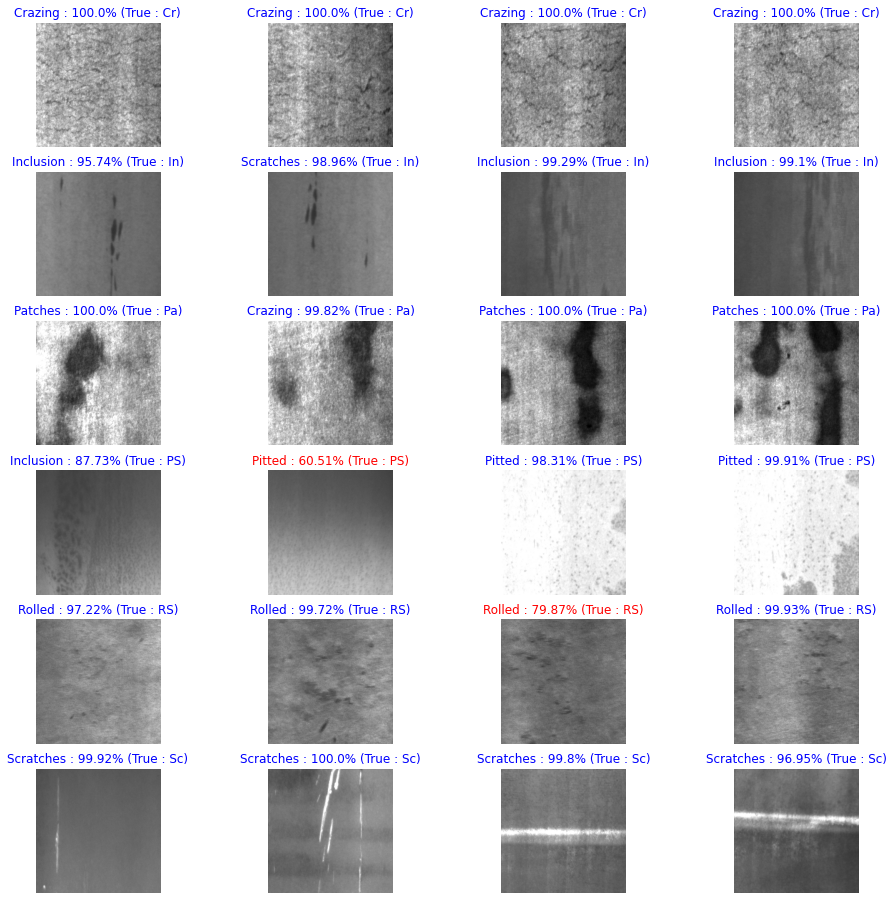

In [85]:
# test 이미지 24건을 분류, 확률값이 80% 이하일 경우 적색 텍스트로 출력 

i = 1
plt.figure(figsize=(16,16))

for file in test_file_list:
    image_pil = Image.open(file).convert("RGB")
    img = np.array(image_pil) / 255.
    img = img[tf.newaxis, ...]
    pred = model.predict(img)
    classes = np.argmax(pred)
    confidence = round(np.max(pred)*100, 2)
    names = labels[classes]
    title = "{} : {}% (True : {})".format(names, confidence, file.split("/")[-1].split("_")[0])
    
    plt.subplot(6,4,i)
    if confidence < 80:
        plt.title(title, color="red")
    else:
        plt.title(title, color="blue")
    plt.axis("off")
    plt.imshow(np.squeeze(img), "gray")
    i += 1
plt.show()